## Homework-2
### Q5


In [ ]:
# import all necessary libraries 

import numpy as np                                    # For matrices and MATLAB like functions                  
from sklearn.model_selection import train_test_split  # To split data into train and test set


# for plotting graphs
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

### Data Generation

Input Feature Vector : $\Large x = [x_1 ,  x_2]^T$ 
<br>
Target Variable : $\Large y$ 
<br>
$$\Large  y = x_1^2 + x_2^3 + x_1x_2$$

In [ ]:
n_samples = 1500

X = np.random.uniform(-5,5, (2, n_samples) ).astype(np.float32)

Y = (X[0, :]**2 + X[1,:]**3 + X[0,:]*X[1,:]).astype(np.float32)


### Visualize Mapping from Input Feature Vector $\Large x = [x_1 ,  x_2]^T$ to target variable $\Large y$

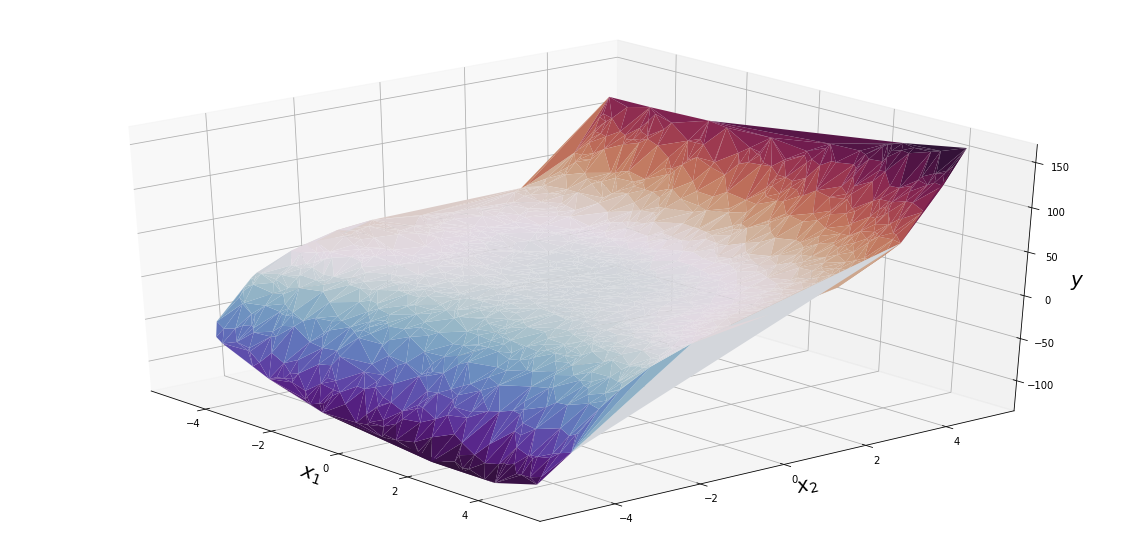

In [ ]:
fig = plt.figure(figsize=(20,10))
ax = plt.axes(projection='3d')


ax.plot_trisurf(X[0],X[1],Y, cmap='twilight_shifted')
ax.view_init(30, -40)

ax.set_xlabel(r'$x_1$', fontsize=20)
ax.set_ylabel(r'$x_2$', fontsize=20)
ax.set_zlabel(r'$y$'  , fontsize=20)

plt.show()

In [ ]:
trainX, testX, trainY, testY = train_test_split(X.T, Y, test_size=0.33, random_state=42)


trainX = trainX.reshape(trainX.shape[0], trainX.shape[1], 1 )
testX  = testX.reshape(testX.shape[0], testX.shape[1], 1 )

trainY = trainY.reshape(trainY.shape[0], 1, 1 )
testY  = testY.reshape(testY.shape[0], 1 ,1)


print("Shape of Train Data:")
print("TrainX: " , trainX.shape)
print("TrainY: " , trainY.shape)



print("\nShape of Test Data:")
print("TestX: " , testX.shape)
print("TestY: " , testY.shape)

Shape of Train Data:
TrainX:  (1005, 2, 1)
TrainY:  (1005, 1, 1)

Shape of Test Data:
TestX:  (495, 2, 1)
TestY:  (495, 1, 1)


---

## NeuralNetwork with Numpy
### Feed Forward and Backpropagation

We will implement 3-layer neural network for regression. Following are the equations for feed forward through network. We are using sigmoid as activation function and mean-squared-error as loss.

$$\Large z_1  = W_1 x + b_1$$
$$\Large h_1  = \sigma(z_1)$$

<br>
<br>

$$\Large z_2  = W_2 h_1 + b_2$$
$$\Large h_2  = \sigma(z_2)$$

<br>
<br>

$$\Large \hat{y}  = W_3 h_2 + b_3$$


<br>
<br>

$$\Large loss  = \frac{1}{N}\sum_{i=1}^{N} (y_i - \hat{y_i})^2 $$
<center>where N is batch size</center>

In [ ]:
class NeuralNetwork(object):        
    
    """
    We will implement neural network as a python class. 
    Object of this class will have a few attributes for example learnable parameters
    and functions such as forward(), backward_propagate() etc.
    
    """
    
    # Initialize attributes of object
    def __init__(self,  input_size = 2 , hidden_size = 3 , output_size = 1 ):        
        
        
        self.input_size  = input_size
        self.hidden_size = hidden_size 
        self.output_size = output_size
        
        
        # Learnable weights of neural network
        self.W1 = np.random.rand( hidden_size , input_size  ) # randomly initialize W1 matrix
        self.b1 = np.random.rand( hidden_size , 1           ) # randomly initialize b1 vector
        
        
        self.W2 = np.random.rand( hidden_size , hidden_size ) # randomly initialize W2 matrix
        self.b2 = np.random.rand( hidden_size , 1           ) # randomly initialize b2 vector
        
        self.W3 = np.random.rand( output_size , hidden_size ) # randomly initialize W3 matrix
        self.b3 = np.random.rand( output_size , 1           ) # randomly initialize b3 vector
        
        
        # Non-learnable parameters of neural network. These parameters are used in back-propagation
        self.z1 = np.zeros( (hidden_size , 1) ) 
        self.h1 = np.zeros( (hidden_size , 1) ) 
        
        self.z2 = np.zeros( (hidden_size , 1) ) 
        self.h2 = np.zeros( (hidden_size , 1) ) 
          
    
    
    
    # This function just prints a few properties of object created from this class    
    def __str__(self):
        
        msg = "NeuralNetwork:\n\nSize of Input Layer = " + str(self.input_size) + "\nSize of 1st Hidden Layer  = " + str(self.hidden_size)+ "\nSize of 2nd Hidden Layer  = " + str(self.hidden_size)+ "\nSize of Output Layer  = " + str(self.output_size)
                
        return  msg
    
        
    # Forward propagation through neural network   
    def forward(self, x):
        
        
        self.z1  = (self.W1 @ self.x ) + self.b1         # @ operator is used for standard matrix-multiplication 
        
        self.h1  = self.sigmoid(z1)            # element-wise operation on vector
        
        # complete forward operation
        self.z2  = (self.W2 @ self.h1) + self.b2         # @ operator is used for standard matrix-multiplication 
        
        self.h2  = self.sigmoid(z2)   
        
        self.z3 = (self.W3 @ self.h2) + self.b3   
        
        y_hat = softmax(z3)
        return y_hat

    
    # Backward propagation through neural network
    def backward(self , y_hat , x , y , lr):

        # Assuming, MSE (mean square error) loss has been computed
        # Using chain rule, find gradients of learnable parameters of neural network
        # Adjust weights and biases using gradients and learning rate 

        # lr = learning rate
        
        
        batch_size = y_hat.shape[0]
        
        
        # Zero-out all gradients
        grad_b3 = np.zeros((batch_size, self.b3.shape[0], self.b3.shape[1] ))
        grad_W3 = np.zeros((batch_size, self.W3.shape[0], self.W3.shape[1] ))
        
        grad_b2 = np.zeros((batch_size, self.b2.shape[0], self.b2.shape[1] ))
        grad_W2 = np.zeros((batch_size, self.W2.shape[0], self.W2.shape[1] ))
        
        grad_b1 = np.zeros((batch_size, self.b1.shape[0], self.b1.shape[1] ))
        grad_W1 = np.zeros((batch_size, self.W1.shape[0], self.W1.shape[1] ))
        
        # Complete back propagation ...
        h3_delta = 2(y-y_hat)    
        delta_z2 = h3_delta.w3.T
        h2_delta = delta_z2.sigmoid_derv(h2)
        delta_z1 = h2_delta.w2.T
        h1_delta = delta_z1.sigmoid_derv(h1)

        a3_delta = mse_loss(self.y_hat, self.y) 
        z2_delta = np.dot(a3_delta, self.w3.T)
        a2_delta = z2_delta * sigmoid_derv(self.a2) 
        z1_delta = np.dot(a2_delta, self.w2.T)
        a1_delta = z1_delta * sigmoid_derv(self.a1) 
        
      
        # Record gradients for all examples in given batch
        # Take average along batch dimension
        grad_b3 = np.sum(h3_delta, axis=0, keepdims=True) 
        grad_W3 = np.dot(self.h2.T, h3_delta)

        grad_b2 = np.sum(h2_delta, axis=0)
        grad_W2 = np.dot(self.h1.T, h2_delta)

        grad_b1 = np.sum(h1_delta, axis=0)
        grad_W1 = np.dot(self.x.T, h1_delta)  
        
        # Gradient Descent
        # Update weights and biases using gradients
        
        self.W3 = self.W3 - lr*grad_W3
        self.b3 = self.b3 - lr*grad_b3
        
        
        self.W2 = self.W2 - lr*grad_W2
        self.b2 = self.b2 - lr*grad_b2

        self.W1 = self.W1 - lr*grad_W1
        self.b1 = self.b1 - lr*grad_b1

        


    def sigmoid_derv(self, x):
        return x*(1-x)  
    
    
    def sigmoid(self, x):
        # Activation Function
                
        sig_x = np.zeros(x.shape)
        
        # protection from overflow and underflow
        low_x = -30
        up_x  = 30
        
        sig_x[x< low_x]=0
        sig_x[x> up_x ]=1
        
        safe_x = x[(x>= low_x) & (x<= up_x)]
        sig_x[(x>= low_x) & (x<= up_x)] = np.exp(safe_x)/(1+np.exp(safe_x))
        
                
        return sig_x
            
    def softmax(x):
        exps = np.exp(x - np.max(x, axis=1, keepdims=True))
        return exps/np.sum(exps, axis=1, keepdims=True) 
    
    def predict(self, testX):
        self.x = testX
        self.forward()
        return self.y_hat.argmax()
         
    def mse_loss(self, y, y_hat):
        # Mean Square Error Loss
        
        loss  =  ((y-y_hat)**2).mean(axis=0)
        
        return loss
 

In [ ]:
model = NeuralNetwork(2,3,1)

In [ ]:
lr = 0.01
n_epochs = 1000
x = trainX
y = trainY
n_examples = x.shape[0]

batch_size = 50

n_batches = n_examples//batch_size

epoch_loss = []


print("\n\nTraining...")
for epoch in range(n_epochs):
    loss=0
    
    for i in range(n_batches):
        
        x = trainX[(i*batch_size):(i*batch_size+batch_size)]
        y = trainY[(i*batch_size):(i*batch_size+batch_size)]
        
        # Forward Pass
        y_hat = model.forward(x)
        loss = loss+model.mse_loss(y,y_hat)
        
        # Backpropagation
        NeuralNetwork.backward(x, y, y_hat ,lr)
        
    epoch_loss.append(loss.squeeze()/n_batches)    
    print("Epoch = %3d   Loss = %3.3f"%(epoch, epoch_loss[epoch]) )
    
print("\nDone.")   